In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import sys

import btk
import btk.plot_utils
import btk.survey
import btk.draw_blends
import btk.catalog
import btk.sampling_functions
import astropy.table

In [2]:
stamp_size = 24.0
batch_size = 8
seed = 0
catalog_name = "../data/sample_input_catalog.fits"
catalog = btk.catalog.CatsimCatalog.from_file(catalog_name)
sampling_function = btk.sampling_functions.DefaultSamplingShear(stamp_size=stamp_size,shear=(0.0,-0.5),seed=seed)
survey = btk.survey.get_surveys("Rubin")

In [3]:
draw_generator = btk.draw_blends.CatsimGenerator(
    catalog,
    sampling_function,
    survey,
    batch_size=100,
    stamp_size=stamp_size,
    cpus=1,
    add_noise=True,
    seed=seed, # same random seed is used here too!
)

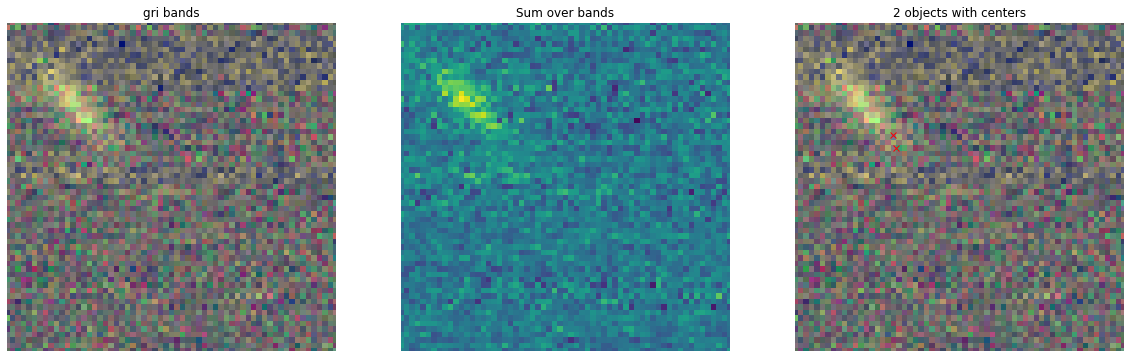

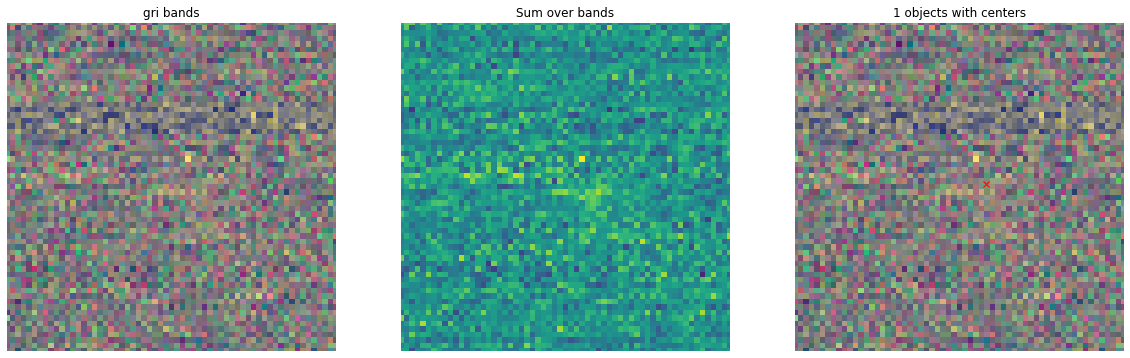

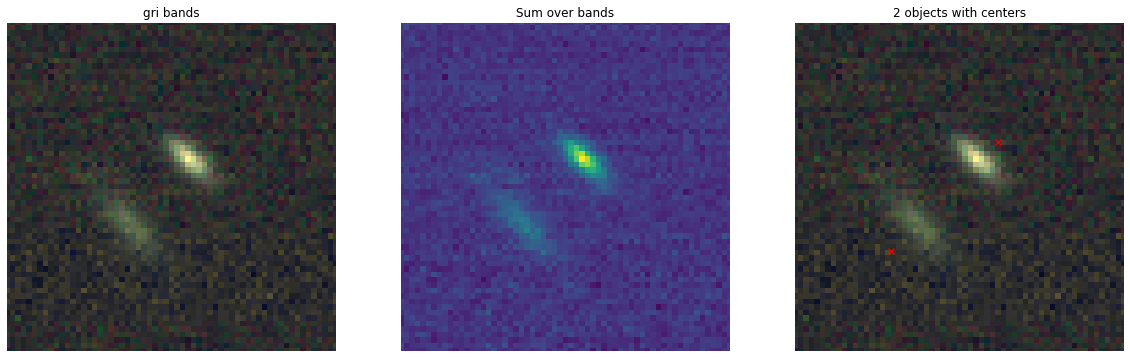

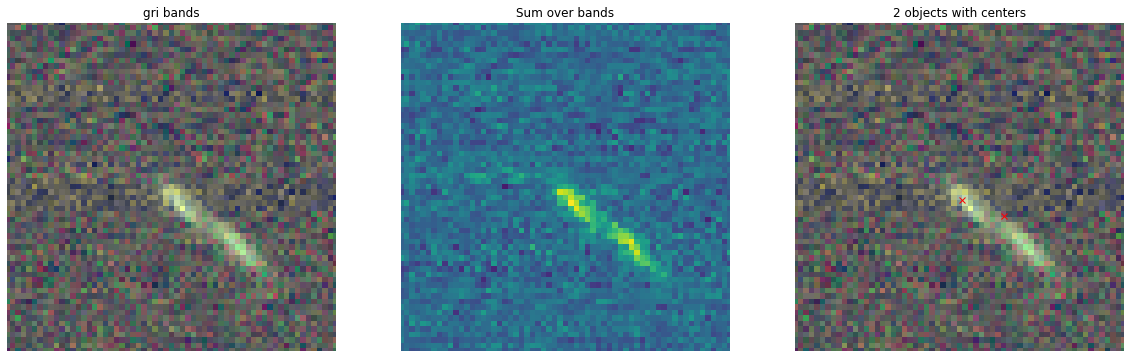

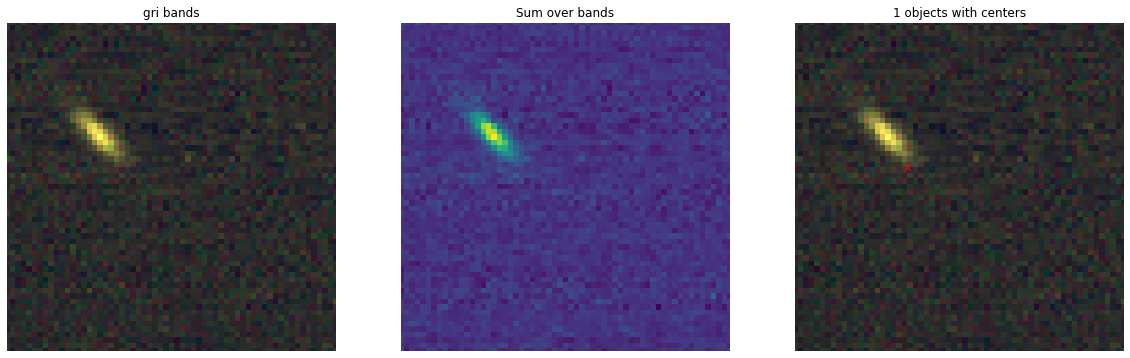

In [4]:
batch = next(draw_generator)
blend_images = batch['blend_images']
blend_list = batch['blend_list']
btk.plot_utils.plot_blends(blend_images[:5], blend_list[:5], limits=(30,90))